# Lecure 8.1 Correlation and linear regression

## Announcement: Syllabus updates for the next two weeks:

This week (week 8): 
- (T, today) introduction to linear models 
- (Th) Netcdf files and analyzing model output

Week 9 : 
- (T) More on plotting and analysing netcdf files (guest lecture by Riley Brady)
- (TH) GIS and python, R vs. python (guest lecture by Tom Yamashita)
- Homework: Research topics due
 
Week 10: 
- (T) General linear models in R (guest lecture by Chris Gabler)
- (Th) Presentation of research topics, Predator Prey Modeling


## 8.1.1 Student analyis presentations (HW from last week)

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for plots
import matplotlib as mpl
%matplotlib inline 
from matplotlib import cm
import pandas as pd

mpl.rcParams['font.size'] = 12

## 8.1.2 Correlation

We touched on correlation preivously. Let's dive in.

### A note of caution:

"Correlation does not imply causation"

Example:
As ice cream sales increase, the rate of drowning deaths increases sharply.
Therefore, ice cream consumption causes drowning.

When we get data, we want to describe how variables relate to each other. The simplest question we can ask are two variables correlated, that is do they change togehter?

The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated. 

Let's use the movie data we worked with previously to test if budgets and gross earnings are correlated

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

(0, 1000000000.0)

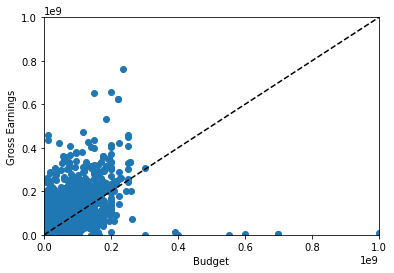

In [4]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In the above I have added the y=x line to visualize if the gross earnings were above the budget. 
Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [5]:
movies.corr()
# Budget and Gross earnings are not very correlated, r = 0.10

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


### E1. What kind of thing is movies? How do you know?

movies is a dataframe.

In [6]:
movies?

Type:        DataFrame
String form:
Year  \
           Title                                <...>   7.7
           Yu-Gi-Oh! Duel Monsters                                   7.0
           
           [5042 rows x 24 columns]
Length:      5042
File:        ~/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexi

### E2. What does it mean that year and duration are negatively correlated? Plot these two variables togther and explain.

The -0.135 means the slop would be negative but this is so close to zero that there's really no correlation

In [7]:
x = movies.Year
y = movies.Duration

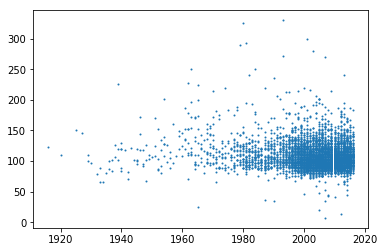

In [8]:
plt.scatter(x,y, s=1)

### E3. Which pairs of variables have the highest correlation? What might explain this?

In [9]:
movies.corr() >= 0.5

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Duration,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Aspect Ratio,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Budget,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Gross Earnings,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
Facebook Likes - Director,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Facebook Likes - Actor 1,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
Facebook Likes - Actor 2,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
Facebook Likes - Actor 3,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
Facebook Likes - cast Total,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False


gross earnings & user votes & reviews by users
Facebook likes actor 2 & facebook likes actor 3
Facebook likes - cast total & facebook likes actor 1 & 2
facebook likes movie & user votes
user votes & reviews by users & reviews by critics

Basically all the things that relate to people interest have a relation. if people like the movie, it'll have higher gross earnings. If people like the cast, they'll probably like the main actors. If people vote for the movie, they likely reviewed it too.

## 8.1.3 Introduction to linear regression

See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction. See https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 for a good intro on the math

Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

Because the movies database has a number of nans in it, it's a bit difficult to work with. Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This tutorial uses the package scikit-learn, which is a collection of advanced data analysis and machine learning functions. We will use this again in the future when we cover machine learning

First lets go over loading in this dataset and converting it to pandas

In [10]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

What we want to do here is to determine which variables contribute to housing prices

In [11]:
data?

Type:        Bunch
String form:
{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
           4.9800e <...> sers/xfm684/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv'}
Length:      5
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py
Docstring:  
Container object for datasets

Dictionary-like object that exposes its keys as attributes.

>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6


In [12]:
# information on the data:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


In [14]:
# are room numbers and value correlated?
np.corrcoef(df["RM"], target["MEDV"])

# note this is a matrix of correlation coefficients, you only need the top right one

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0, 0.5, 'House value ($1000s)')

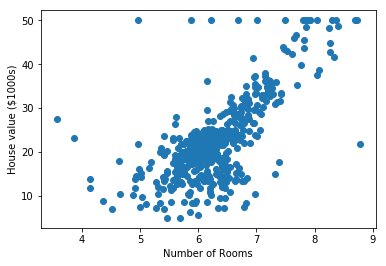

In [15]:
# lets visualize
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Discuss: how well does this plot agree with the correlation coefficient we got? What might be affecting the results?

outliers

### E4. Create a second dataframe with the housing value added as a column. What variables correlate most with housing value? Hypothesize why this might be.

0.695 RM (rooms) have the highest correlation. This makes sense as discussed.
0.360 ZN (zoned land) is the next highest correlation, which isn't very high. 

-0.737 LSTAT (% lower status of the population) has the highest negative correlation.
-0.507 PTRATIO (pupil teacher ratio) second highest negative correlation. You want less of a ratio of pupils to teachers for more one on one time.

In [16]:
df["housing_value"] = pd.DataFrame(data.target, columns=["MEDV"])

In [17]:
df.corr()
#parenthesis are important here

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,housing_value
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
df.corr() >= 0.5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,housing_value
CRIM,True,False,False,False,False,False,False,False,True,True,False,False,False,False
ZN,False,True,False,False,False,False,False,True,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,True,False,True,True,False,False,True,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,False,True,True,False,False,True,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,True
AGE,False,False,True,False,True,False,True,False,False,True,False,False,True,False
DIS,False,True,False,False,False,False,False,True,False,False,False,False,False,False
RAD,True,False,True,False,True,False,False,False,True,True,False,False,False,False
TAX,True,False,True,False,True,False,True,False,True,True,False,False,True,False


Before we go into the online tutorial, which uses scikit learn, let's do some basic linear regression with the scipy and statsmodels packages, so you can see how they compare.

### Doing a linear regression using scipy

In [19]:
from scipy import stats

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

this gives us the slope and intercept of the line, the corrlation (r_value)

A low p-value (< 0.05) indicates that the linear regression is a good model

the standard error is the standard deviation of the data from the model (instead of the mean)

In [21]:
slope

9.102108981180306

In [22]:
intercept

-34.67062077643854

In [23]:
r_value
# note this is the same correlation value we got before

0.695359947071539

In [24]:
p_value

2.487228871008377e-74

In [25]:
std_err

0.41902656012134054

Text(0, 0.5, 'House value ($1000s)')

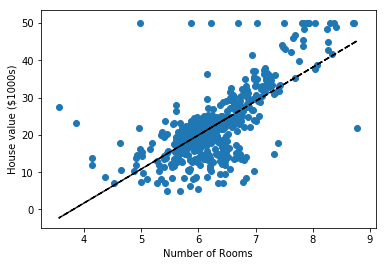

In [26]:
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### E5. In the above plot, write the equation of the fitted line the title, using the values for the slope and intercept to a reasonable number of signifigant digits.

Text(0.5, 1.0, 'y = 9.102x - 34.67')

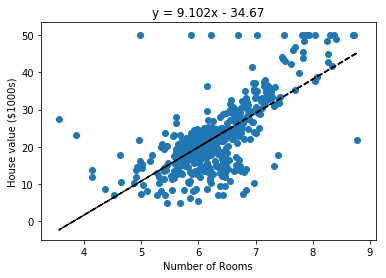

In [27]:
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
plt.title('y = 9.102x - 34.67')

## Doing a linear regression using statsmodels

Statsmodels is a powerful statistics package that is very popular

See https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

and

https://www.statsmodels.org/dev/index.html

http://www.statsmodels.org/dev/examples/index.html#linear-regression-models

Note that with statsmodels you can do generalized linear regression, i.e. regression with more than one variable: 

y = a*X_1 + b*X_2 + ...

In [28]:
import statsmodels.api as sm

In [29]:
# look at the helpfiles for OLS, ordinary least squares fitting, aka linear fitting
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and a

In [30]:
# same data as before:
X = df["RM"] # what we think the cost depends on
y = target["MEDV"]

In [31]:
# Note y, the target of what we are fitting to, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, i.e. using an intercept of zero

In [32]:
model.params

RM    3.65335
dtype: float64

In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          3.74e-256
Time:                        14:06:16   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.0

In [34]:
predictions = model.predict(X) # make the predictions by the model

Text(0, 0.5, 'House value ($1000s)')

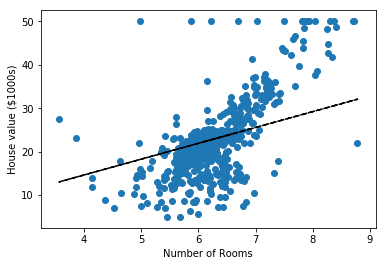

In [35]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

The above was not a good fit, because we are assuming the intercept is zero

### E6. Following the example in the documentation below, add an intercept to the model and plot your result

http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [36]:
predictions = model.predict(X) - 34.67
#this got the yintercept w

Text(0, 0.5, 'House value ($1000s)')

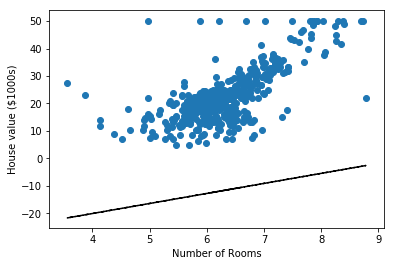

In [37]:

plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

In [38]:
##################       SCRATCH       ############################

In [39]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [40]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e #this is supposed to somehow add in the y-intercept

In [41]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.115e+06
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          2.40e-244
Time:                        14:06:19   Log-Likelihood:                -134.46
No. Observations:                 100   AIC:                             274.9
Df Residuals:                      97   BIC:                             282.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8727      0.277      3.148      0.0

## Note: if you don't finish the below in lab, complete for homework

### E7. Complete the tutorial: 

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

### E8. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?

This may be helpful is figuring out how to write out the slope and intercept:

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2